In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **1. Find Customer segments using K-means clustering algorithm**

In [100]:
data = pd.read_csv("/content/customer_segmentation.csv")

In [101]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [102]:
len(data["Year_Birth"].unique())

59

In [103]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [104]:
data.dropna(subset=['Income'], inplace=True)

In [79]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [105]:
data["Response"].unique()

array([1, 0])

In [107]:
from datetime import datetime

current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

In [108]:
data.drop("Year_Birth",inplace=True,axis=1)

In [109]:
counts = data['Dt_Customer'].value_counts()
data[data['Dt_Customer'].isin(counts[counts < 2].index)]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
9,5899,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,...,1,0,0,0,0,0,3,11,0,75
26,2404,Graduation,Married,53359.0,1,1,27-05-2013,4,173,4,...,0,0,0,0,0,0,3,11,0,49
47,7286,Graduation,Together,41728.0,1,0,24-05-2013,92,13,6,...,0,0,0,0,0,0,3,11,0,57
134,5290,PhD,Married,41551.0,1,1,14-08-2013,51,220,0,...,0,0,0,0,0,0,3,11,0,61
139,1461,PhD,Divorced,36921.0,1,1,28-07-2013,74,17,1,...,0,0,0,0,0,0,3,11,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,3969,Master,Together,43018.0,0,1,01-11-2013,46,35,4,...,0,0,0,0,0,0,3,11,0,51
2121,10067,2n Cycle,Together,25176.0,1,1,10-08-2013,79,4,0,...,0,0,0,0,0,0,3,11,0,49
2160,5667,PhD,Married,60896.0,0,1,11-10-2012,90,1013,30,...,0,0,0,0,0,0,3,11,1,61
2215,692,Graduation,Together,36807.0,1,1,20-12-2012,88,4,2,...,0,0,0,0,0,0,3,11,0,71


In [110]:
data['Dt_Customer']

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014
...,...
2235,13-06-2013
2236,10-06-2014
2237,25-01-2014
2238,24-01-2014


In [112]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')


In [115]:
from datetime import datetime

# Current date
current_date = datetime.now()

# Tenure in days
data['Customer_Tenure'] = (current_date - data['Dt_Customer']).dt.days

# Year, Month, Day features (optional)
data['Customer_Year'] = data['Dt_Customer'].dt.year
data['Customer_Month'] = data['Dt_Customer'].dt.month
data['Customer_Day'] = data['Dt_Customer'].dt.day


In [116]:
data.drop(["Dt_Customer", "Customer_Year", "Customer_Month", "Customer_Day"], axis=1, inplace=True)

In [119]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Customer_Tenure'],
      dtype='object')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   int64 

In [121]:
data['Children'] = data['Kidhome'] + data['Teenhome']

In [123]:
data2 = data[['Income', 'Age', 'Recency', 'Customer_Tenure',
 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
 'MntSweetProducts', 'MntGoldProds',
 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
 'NumStorePurchases', 'NumWebVisitsMonth', 'Children']]

In [128]:
from sklearn.preprocessing import LabelEncoder
ln = LabelEncoder()
for i in data2.columns:
  if data2[i].dtypes == object:
    data2[i] = ln.fit_transform(data2[i])

In [129]:
data2

,Income,Age,Recency,Customer_Tenure,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children
0,58138.0,68,58,4715,635,88,546,172,88,88,3,8,10,4,7,0
1,46344.0,71,38,4165,11,1,6,2,1,6,2,1,1,2,5,2
2,71613.0,60,26,4364,426,49,127,111,21,42,1,8,2,10,4,0
3,26646.0,41,26,4191,11,4,20,10,3,5,2,2,0,4,6,1
4,58293.0,44,94,4213,173,43,118,46,27,15,5,5,3,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,58,46,4433,709,43,182,42,118,247,2,9,3,4,5,1
2236,64014.0,79,56,4071,406,0,30,0,0,8,7,8,2,5,7,3
2237,56981.0,44,91,4207,908,48,217,32,12,24,1,2,3,13,6,0
2238,69245.0,69,8,4208,428,30,214,80,30,61,2,6,5,10,3,1


In [131]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data2)

In [132]:
data2

,Income,Age,Recency,Customer_Tenure,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children
0,58138.0,68,58,4715,635,88,546,172,88,88,3,8,10,4,7,0
1,46344.0,71,38,4165,11,1,6,2,1,6,2,1,1,2,5,2
2,71613.0,60,26,4364,426,49,127,111,21,42,1,8,2,10,4,0
3,26646.0,41,26,4191,11,4,20,10,3,5,2,2,0,4,6,1
4,58293.0,44,94,4213,173,43,118,46,27,15,5,5,3,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,58,46,4433,709,43,182,42,118,247,2,9,3,4,5,1
2236,64014.0,79,56,4071,406,0,30,0,0,8,7,8,2,5,7,3
2237,56981.0,44,91,4207,908,48,217,32,12,24,1,2,3,13,6,0
2238,69245.0,69,8,4208,428,30,214,80,30,61,2,6,5,10,3,1


In [134]:
from sklearn.cluster import KMeans

In [135]:
km = KMeans(n_clusters = 3)

In [49]:
km

KMeans(n_clusters=3)

In [137]:
y_predicted = km.fit_predict(data2)
y_predicted

array([2, 2, 0, ..., 2, 0, 2], dtype=int32)

In [139]:
data2["range"] = y_predicted

In [143]:
r1 = data2[data2.range==0]
r2 = data2[data2.range==1]
r3 = data2[data2.range==2]

In [144]:
data2

,Income,Age,Recency,Customer_Tenure,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,range
0,58138.0,68,58,4715,635,88,546,172,88,88,3,8,10,4,7,0,2
1,46344.0,71,38,4165,11,1,6,2,1,6,2,1,1,2,5,2,2
2,71613.0,60,26,4364,426,49,127,111,21,42,1,8,2,10,4,0,0
3,26646.0,41,26,4191,11,4,20,10,3,5,2,2,0,4,6,1,1
4,58293.0,44,94,4213,173,43,118,46,27,15,5,5,3,6,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,58,46,4433,709,43,182,42,118,247,2,9,3,4,5,1,2
2236,64014.0,79,56,4071,406,0,30,0,0,8,7,8,2,5,7,3,2
2237,56981.0,44,91,4207,908,48,217,32,12,24,1,2,3,13,6,0,2
2238,69245.0,69,8,4208,428,30,214,80,30,61,2,6,5,10,3,1,0


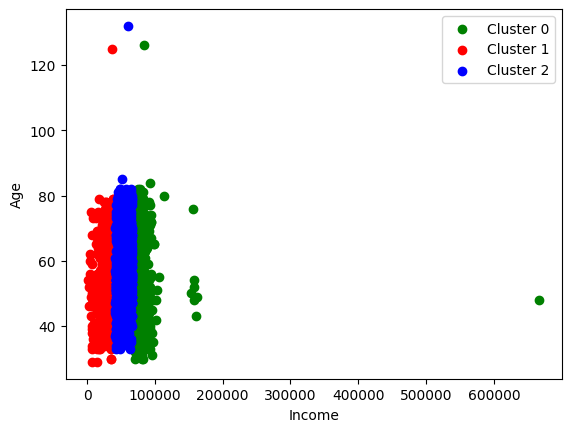

In [146]:
plt.scatter(r1.Income, r1.Age, color="green", label='Cluster 0')
plt.scatter(r2.Income, r2.Age, color="red", label='Cluster 1')
plt.scatter(r3.Income, r3.Age, color="blue", label='Cluster 2')

plt.xlabel("Income")
plt.ylabel("Age")
plt.legend()
plt.show()